<a href="https://colab.research.google.com/github/tincorpai/tincorpai-Data-Preparation-and-Cleaning-in-Machine-Learning-/blob/master/Basic_Data_Cleaning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Cleaning 

Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model.

Data cleaning is used to refer to all kinds of tasks and activities to detect and repair errors in the data.


In [ ]:
#importing pandas
import pandas as pd
from numpy import loadtxt
from numpy import unique


In [ ]:
#read in the oil spill dataset
# load the dataset
data1 = loadtxt('Oil_spill.txt', delimiter=',')

data2 =  pd.read_csv("iris_dataset.txt", sep = ",", header = None)

The following example below loads the oil-spill classification dataset that contains 50 variables and summarizes the number of unique values for each column.

In [ ]:
for i in range(data1.shape[1]):
    print(i, len(unique(data1[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


We can see column index 22 has single value and should be removed.

Instead, we can use the pandas instead. The following example demonstrates how this can be applied.

In [ ]:
#load the dataset
data3 = pd.read_csv('Oil_spill.txt', header=None)
print(data3.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## Delete Columns That Contain a Single Value

Variables or columns have zero variance and should be removed from our dataset. One method of doing this is to record all columns that have a single unique value, then delete them from Pandas DataFrame by calling drop() function.

In [ ]:
#Get the number of uniqe values for each column 
counts = data3.nunique()

In [ ]:
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

In [ ]:
#record columns to delete 
to_del = [i for i, v in enumerate(counts) if v==1]

In [ ]:
print(to_del)

In [ ]:
data3.drop(to_del, axis = 1, inplace = True)

In [ ]:
print(data3.shape)

Consider Columns with few Values 

Some columns that are not categorical variables do contains few numerical values. Such columns might contain 2, 4, or 9 unique numerical variables. These type of columns or predictors are referred to as near-zero variance predictors, as their variance is not zero, but a very small number close to zero.

These columns may or may contribute to the skill of a model. We can't assume that they are useless to modelling. Also, columns of these type can cause errors when using power transformms for data preparation and when fitting linear models. To help identify columns of these type, calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset.

In [ ]:
#summarize the percentage of unique values for each column using numpy
for i in range(data1.shape[1]):   #iterate over all columns 
    num = len(unique(data1[:, i]))   #return the number of unique value in each column
    percentage = float(num) / data.shape[0] * 100   #return the percentage of unique value in each column 
    print('%d, %d, %.1f%%' % (i, num, percentage))   #return percentage of unique value in value in each column.


This example can be summarized for these variables that have unique values that are less than 1 percent of the entire number  of rows.


In [ ]:
#summarize the percentage of unique values for each column using numpy
for i in range(data1.shape[1]):   #iterate over all columns 
    num = len(unique(data1[:, i]))   #return the number of unique value in each column
    percentage = float(num) / data1.shape[0] * 100   #return the percentage of unique value in each column 
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))   #return percentage of unique value in value in each column.


21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


We can see that eleven out of the 50 variables have numerical variables that have unique values that are less than 1 percent of the number of rows. These does not mean that these rows and columns should be deleted, they require futher atention by considering the following circumstances:

> The unique values can be encoded as ordinal values?

> Perhaps the unique values can be encoded as categorical values?

> We can consider the situation of removing each variable from the dataset?

In [ ]:
to_del = [i for i, v in enumerate(counts) if (float(v)/data3.shape[0]*100) < 1]
print(to_del)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]


Delete columns under the above conditions

In [ ]:
data3.drop(to_del, axis=1, inplace=True)

In [ ]:
print(data3.shape)

(937, 39)


## Remove Columns With Low Variance 

The variance can be used as a filter for identifying columns to be removed from the dataset.

In [ ]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# load the dataset
df = read_csv('Oil_spill.txt', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


In [ ]:
data

array([[1.00000e+00, 2.55800e+03, 1.50609e+03, ..., 6.57400e+01,
        7.95000e+00, 1.00000e+00],
       [2.00000e+00, 2.23250e+04, 7.91100e+01, ..., 6.57300e+01,
        6.26000e+00, 0.00000e+00],
       [3.00000e+00, 1.15000e+02, 1.44985e+03, ..., 6.58100e+01,
        7.84000e+00, 1.00000e+00],
       ...,
       [2.02000e+02, 1.40000e+01, 2.51400e+01, ..., 6.59100e+01,
        6.12000e+00, 0.00000e+00],
       [2.03000e+02, 1.00000e+01, 9.60000e+01, ..., 6.59700e+01,
        6.32000e+00, 0.00000e+00],
       [2.04000e+02, 1.10000e+01, 7.73000e+00, ..., 6.56500e+01,
        6.26000e+00, 0.00000e+00]])

We want to see what happen when we use different threshold.

In [ ]:
# define thresholds to check
import numpy as np
thresholds = np.arange(0.0, 0.55, 0.05)


#Apply transform with each threshold
results = list()

#This code returns the number of columns that remain at each threshold 
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)


>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


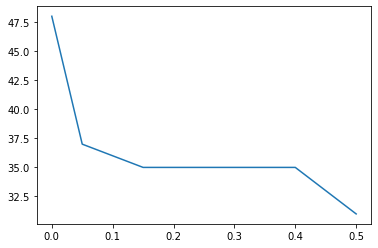

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
pyplot.plot(thresholds, results)
pyplot.show()

## Identify Rows That Contain Duplicate Data

Rows wth identical data could poccess less information to solving the modeling problem and could be dangerously misleading as well during model evaluation. A duplicate row is a row where each value in each column for that row appears in identically the same order in another row.


From an algorithm evaluation perspective, duplicate rows will result in misleading performance. A typical example of this issue can be found a train/test split during cross-validation process, then it is possible for a duplicate row or rows to appear in both train and test datasets and any evaluation of the model on these rows will be correct. This will result in an optimistically biased estimate of performance to unseen data.

In order to check for duplicated rows, use the duplicated() function from Pandas.

In [ ]:
from pandas import read_csv

In [ ]:
#load the dataset
data2 =  pd.read_csv("iris_dataset.txt", sep = ",", header = None)

In [ ]:
#calculate duplicates
dups = data2.duplicated()

In [ ]:
print(dups.any())

True


In [ ]:
#list all duplcates rows 
print(data2[dups])

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


Delete rows with Duplicate Data

Duplicate data should be deleted from the dataset prior to machine learning modelling. We can make use of drop_duplicates() function from Pandas.

In [ ]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
print(data2.shape)
# delete duplicate rows
data2.drop_duplicates(inplace=True)
print(data2.shape)


(150, 5)
(147, 5)
